## Reddit network of user interactions in a specific thread

Capturing and visualising how users interact with each other on different threads.

- Green - Non-quarantined subs (gaming, aww...)
- Blue - Non-quarantined (changemyview)
- Yellow - Self defined echo chamber (the_donald)
- Red - Quarantined Subreddit (theredpill)

In [4]:
import praw
import csv

import networkx as nx
G=nx.Graph()

import matplotlib.pyplot as plt

# Authenticate into Reddit
reddit = praw.Reddit(client_id='1QKQYY6zEUgYUw',
                     client_secret='8xyLf9B_raDH9FIs54t3yzYqBqc',
                     password='redditpw',
                     user_agent='testscript by /u/praw_test_1',
                     username='praw_test_1')

In [4]:
# Function which takes in a thread_id, the node color and the subreddit name
# Visualises the relationship between each comment and their parent comment
# A user is a node. An edge is created when they reply to the comment/thread


def network_users_thread(thread_id, color,subreddit):
    
    G.clear()
    
    # Create CSV file with user interaction relationships
    with open('network_files/comments_'+thread_id+'.csv', mode='w') as comments_file:
        comments_file = csv.writer(comments_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

        submission = reddit.submission(id=thread_id)
        submission.comments.replace_more(limit=None)

        for comment in submission.comments.list():
            parent = comment.parent()

            comments_file.writerow([comment.id, comment.author, parent.id, parent.author])

            for reply in comment.replies.list():
                reply_parent = reply.parent()

                comments_file.writerow([reply.id, reply.author, reply_parent.id, reply_parent.author])

    # Open the CSV file and use to graph the network
    with open('network_files/comments_'+thread_id+'.csv') as commentsreader:
        commentsreader = csv.reader(commentsreader, delimiter=',', quotechar='|')
        for row in commentsreader:
            G.add_edge(row[1],row[3])

        nx.draw(G, node_size=100, alpha=0.4, node_color=color)
        # labels=nx.draw_networkx_labels(G,pos=nx.spring_layout(G),font_size=6)

        plt.title(subreddit)
        plt.show()
    

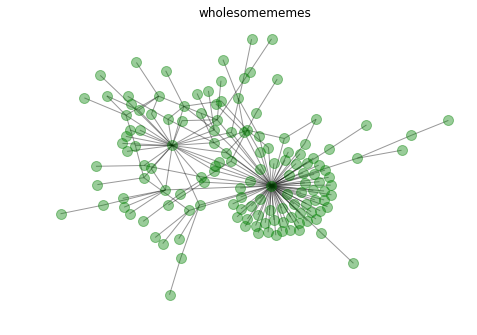

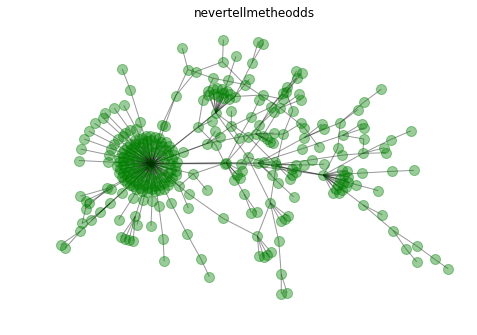

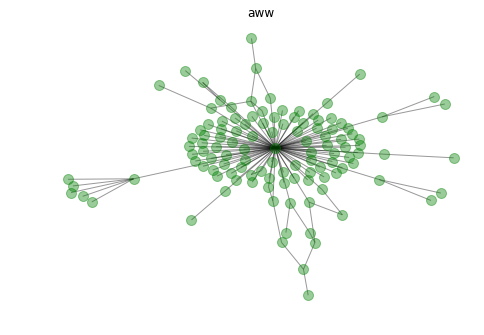

In [25]:
# https://www.reddit.com/r/wholesomememes/comments/bc9u05/well_raised_boy/
network_users_thread('bc9u05','g','wholesomememes')

# https://www.reddit.com/r/nevertellmetheodds/comments/bc91z0/that_some_miss/
network_users_thread('bc91z0','g','nevertellmetheodds')

#  https://www.reddit.com/r/aww/comments/bc88kx/drove_four_hours_to_meet_and_take_home_this/
network_users_thread('bc88kx','g','aww')

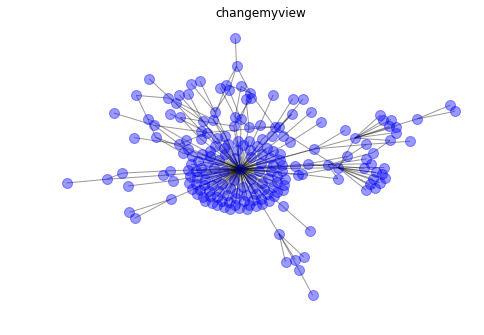

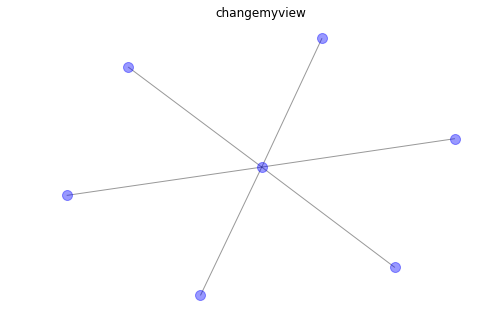

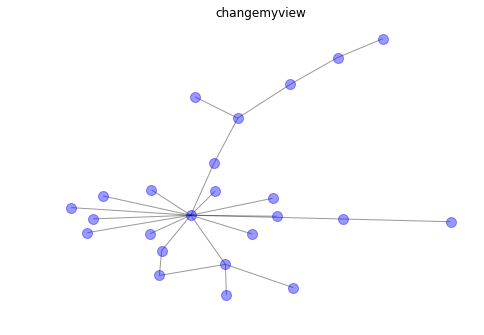

In [27]:
# https://www.reddit.com/r/changemyview/comments/bby3h7/cmv_barring_any_new_major_controversies_donald/
network_users_thread('bby3h7','b','changemyview')

# https://www.reddit.com/r/changemyview/comments/bc8ofq/cmv_people_who_claim_capitalism_caused_or_is/
network_users_thread('bc8ofq','b','changemyview')

# https://www.reddit.com/r/changemyview/comments/bc730b/cmv_discriminating_on_weight_is_not_the_same_as/
network_users_thread('bc730b','b','changemyview')

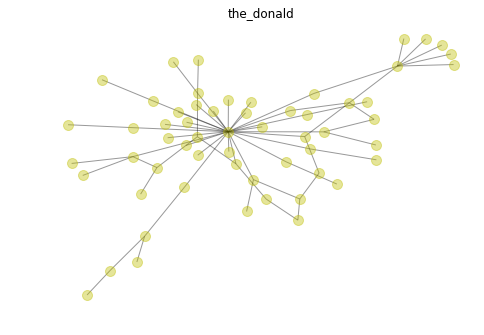

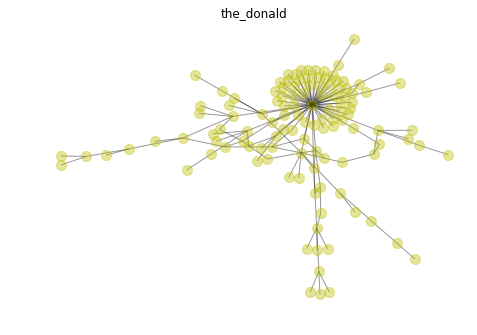

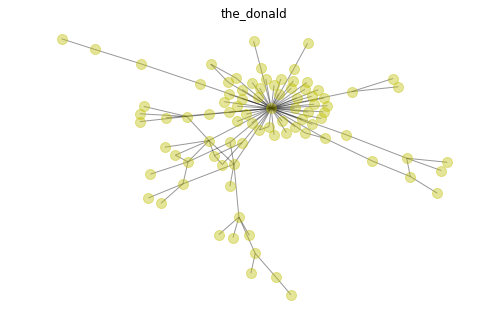

In [8]:
# https://www.reddit.com/r/The_Donald/comments/bc8on0/cnn_quick_change_the_narrative_to_something_that/
network_users_thread('bc8on0','y','the_donald')

# https://www.reddit.com/r/The_Donald/comments/bc6l6d/house_democrats_want_to_negotiate_a_2_trillion/
network_users_thread('bc6l6d','y','the_donald')

# https://www.reddit.com/r/The_Donald/comments/bc6zwx/and_the_radical_dems_reeling_in_disarray_as_the/
network_users_thread('bc6zwx','y','the_donald')

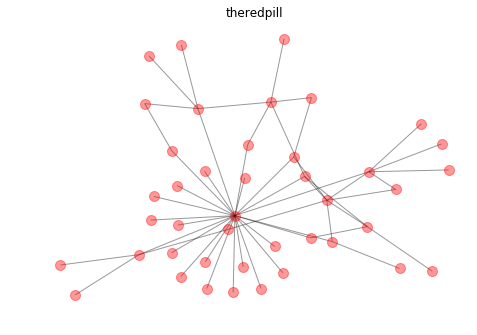

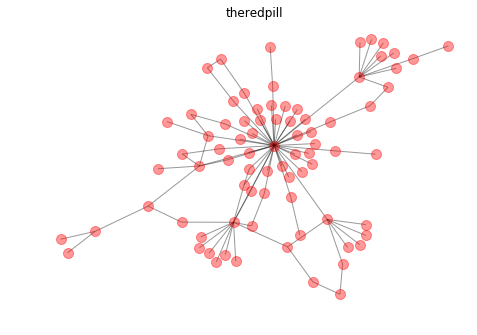

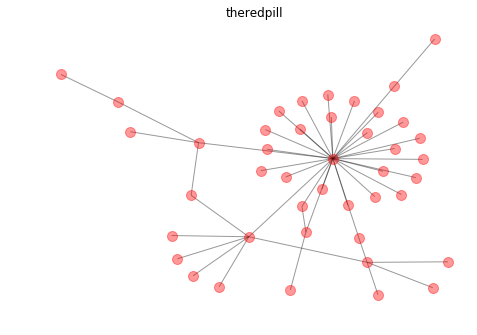

In [9]:
# https://www.reddit.com/r/TheRedPill/comments/baxqte/the_thing_you_really_want/
network_users_thread('baxqte','r','theredpill')

# https://www.reddit.com/r/TheRedPill/comments/bbl660/agree_and_amplify_why_it_is_such_an_important_tool/
network_users_thread('bbl660','r','theredpill')
    
# https://www.reddit.com/r/TheRedPill/comments/bbnnex/he_doesnt_deserve_you/
network_users_thread('bbnnex','r','theredpill')

In [5]:
# Degree Historgram Function

def histogram_users_thread(thread_id, color, subreddit):
    
    G.clear()

    # Open the CSV file and use to graph the network
    with open('network_files/comments_'+thread_id+'.csv') as commentsreader:
        commentsreader = csv.reader(commentsreader, delimiter=',', quotechar='|')
        for row in commentsreader:
            G.add_edge(row[1],row[3])
        
        plt.hist(list(dict(nx.degree(G)).values()), color = color)
        plt.title("Degree Histogram for " + subreddit)
        plt.show()

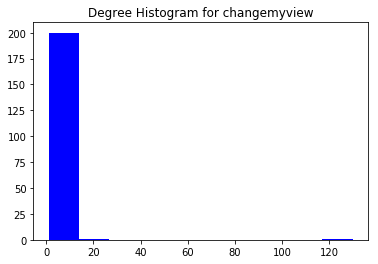

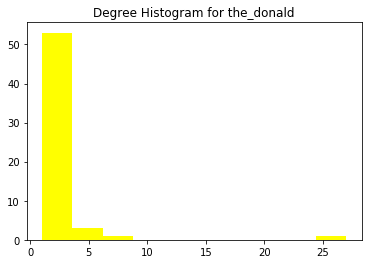

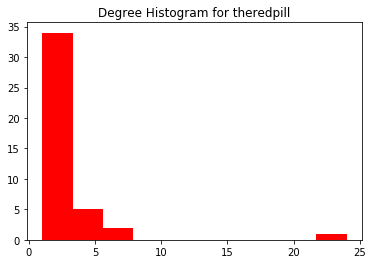

In [28]:
# https://www.reddit.com/r/changemyview/comments/bby3h7/cmv_barring_any_new_major_controversies_donald/
histogram_users_thread('bby3h7','blue','changemyview')

# https://www.reddit.com/r/The_Donald/comments/bc8on0/cnn_quick_change_the_narrative_to_something_that/
histogram_users_thread('bc8on0','yellow','the_donald')

# https://www.reddit.com/r/TheRedPill/comments/baxqte/the_thing_you_really_want/
histogram_users_thread('baxqte','red','theredpill')

In [11]:
# Degree Rank Plot Function

def degrank_users_thread(thread_id,color,subreddit):
    
    G.clear()

    # Open the CSV file and use to graph the network
    with open('network_files/comments_'+thread_id+'.csv') as commentsreader:
        commentsreader = csv.reader(commentsreader, delimiter=',', quotechar='|')
        for row in commentsreader:
            G.add_edge(row[1],row[3])

        degree_sequence=sorted([d for n,d in G.degree()],reverse=True) # degree sequence
        #print "Degree sequence", degree_sequence
        dmax=max(degree_sequence)

        plt.loglog(degree_sequence,'b-',marker='o', color=color)
        plt.title("Degree Rank Plot for " +subreddit)
        plt.ylabel("degree")
        plt.xlabel("rank")
    
    plt.show()


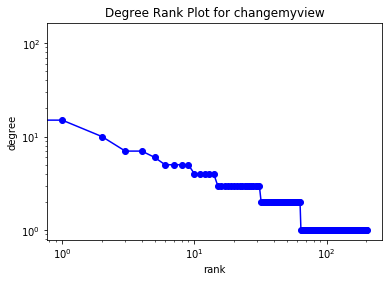

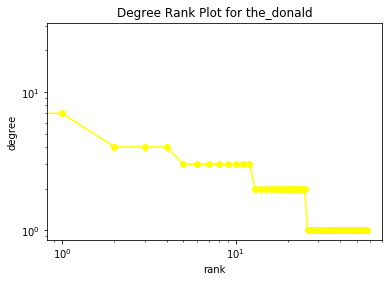

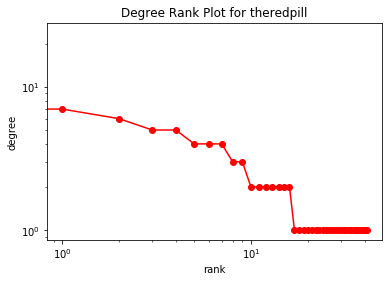

In [30]:
# https://www.reddit.com/r/changemyview/comments/bby3h7/cmv_barring_any_new_major_controversies_donald/
degrank_users_thread('bby3h7','blue','changemyview')

# https://www.reddit.com/r/The_Donald/comments/bc8on0/cnn_quick_change_the_narrative_to_something_that/
degrank_users_thread('bc8on0','yellow','the_donald')

# https://www.reddit.com/r/TheRedPill/comments/baxqte/the_thing_you_really_want/
degrank_users_thread('baxqte','red','theredpill')

## CLEAN THIS - multiple threads in subreddit graph

In [169]:
def network_users_thread_multiple(thread_id1, thread_id2, thread_id3, thread_id4, thread_id5, color,subreddit):
    
    G.clear()


    # Create CSV file with user interaction relationships
    with open('network_files/comments_'+'5threads'+subreddit+'.csv', mode='a') as comments_file:
        comments_file = csv.writer(comments_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)


        submission = reddit.submission(id=thread_id1)
        submission.comments.replace_more(limit=None)

        for comment in submission.comments.list():
            parent = comment.parent()

            comments_file.writerow([comment.id, comment.author, parent.id, parent.author])

            for reply in comment.replies.list():
                reply_parent = reply.parent()

                comments_file.writerow([reply.id, reply.author, reply_parent.id, reply_parent.author])

                
        # Create CSV file with user interaction relationships
        with open('network_files/comments_'+'5threads'+subreddit+'.csv', mode='a') as comments_file:
            comments_file = csv.writer(comments_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)


            submission = reddit.submission(id=thread_id2)
            submission.comments.replace_more(limit=None)

            for comment in submission.comments.list():
                parent = comment.parent()

                comments_file.writerow([comment.id, comment.author, parent.id, parent.author])

                for reply in comment.replies.list():
                    reply_parent = reply.parent()

                    comments_file.writerow([reply.id, reply.author, reply_parent.id, reply_parent.author])
                    
                        
        # Create CSV file with user interaction relationships
        with open('network_files/comments_'+'5threads'+subreddit+'.csv', mode='a') as comments_file:
            comments_file = csv.writer(comments_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)


            submission = reddit.submission(id=thread_id3)
            submission.comments.replace_more(limit=None)

            for comment in submission.comments.list():
                parent = comment.parent()

                comments_file.writerow([comment.id, comment.author, parent.id, parent.author])

                for reply in comment.replies.list():
                    reply_parent = reply.parent()

                    comments_file.writerow([reply.id, reply.author, reply_parent.id, reply_parent.author])
                    
                        
        # Create CSV file with user interaction relationships
        with open('network_files/comments_'+'5threads'+subreddit+'.csv', mode='a') as comments_file:
            comments_file = csv.writer(comments_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)


            submission = reddit.submission(id=thread_id5)
            submission.comments.replace_more(limit=None)

            for comment in submission.comments.list():
                parent = comment.parent()

                comments_file.writerow([comment.id, comment.author, parent.id, parent.author])

                for reply in comment.replies.list():
                    reply_parent = reply.parent()

                    comments_file.writerow([reply.id, reply.author, reply_parent.id, reply_parent.author])
                    
                        
        # Create CSV file with user interaction relationships
        with open('network_files/comments_'+'5threads'+subreddit+'.csv', mode='a') as comments_file:
            comments_file = csv.writer(comments_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)


            submission = reddit.submission(id=thread_id5)
            submission.comments.replace_more(limit=None)

            for comment in submission.comments.list():
                parent = comment.parent()

                comments_file.writerow([comment.id, comment.author, parent.id, parent.author])

                for reply in comment.replies.list():
                    reply_parent = reply.parent()

                    comments_file.writerow([reply.id, reply.author, reply_parent.id, reply_parent.author])

    # Open the CSV file and use to graph the network
    with open('network_files/comments_'+'5threads'+subreddit+'.csv') as commentsreader:
        commentsreader = csv.reader(commentsreader, delimiter=',', quotechar='|')
        for row in commentsreader:
            G.add_edge(row[1],row[3])

        nx.draw(G, node_size=100, alpha=0.4, node_color=color)
        # labels=nx.draw_networkx_labels(G,pos=nx.spring_layout(G),font_size=6)

        plt.title(subreddit)
        plt.show()
    

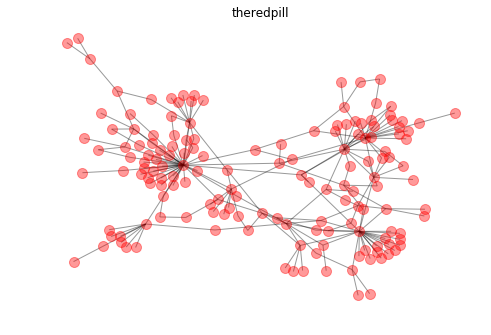

In [45]:
# https://www.reddit.com/r/TheRedPill/comments/bbqxoe/its_a_numbers_game/
# https://www.reddit.com/r/TheRedPill/comments/baxqte/the_thing_you_really_want/
# https://www.reddit.com/r/TheRedPill/comments/bbl660/agree_and_amplify_why_it_is_such_an_important_tool/
# https://www.reddit.com/r/TheRedPill/comments/bbnnex/he_doesnt_deserve_you/
# https://www.reddit.com/r/TheRedPill/comments/bbpc0b/snapchat_and_social_media_is_a_buffer/


network_users_thread_multiple('bbqxoe', 'baxqte', 'bbl660', 'bbnnex', 'bbpc0b', 'red','theredpill')

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


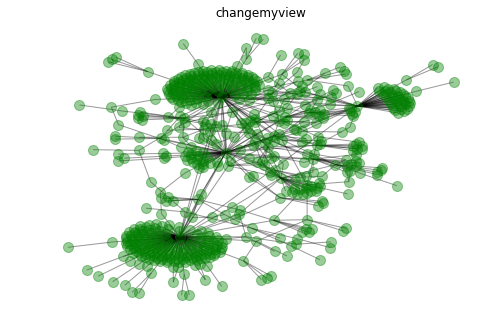

In [170]:
# https://www.reddit.com/r/changemyview/comments/bcdj1t/cmv_i_dont_need_a_last_will_and_testament_despite/
# https://www.reddit.com/r/changemyview/comments/bc730b/cmv_discriminating_on_weight_is_not_the_same_as/
# https://www.reddit.com/r/changemyview/comments/bc6ro5/cmv_reparations_for_slavery_will_never_work/
# https://www.reddit.com/r/changemyview/comments/bc2md3/cmv_all_prisoners_in_the_united_states_should_be/
# https://www.reddit.com/r/changemyview/comments/bbm8a1/cmv_the_40_hour_work_week_is_an_outdated_concept/

network_users_thread_multiple('bcdj1t', 'bc730b', 'bc6ro5', 'bc2md3', 'bbm8a1', 'green','changemyview')
# DO THIS AGAIN!!

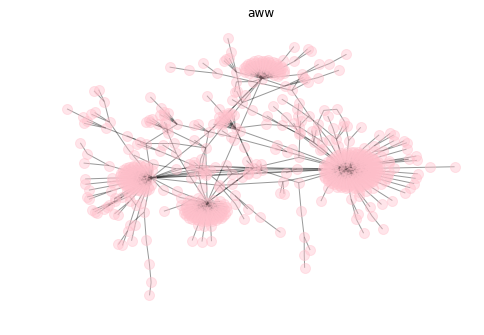

In [171]:
# https://www.reddit.com/r/aww/comments/bc96eb/when_your_dog_is_prettier_than_you/
# https://www.reddit.com/r/aww/comments/bc9ewq/surprised_my_parents_in_portugal_with_their/
# https://www.reddit.com/r/aww/comments/bc9i3h/brave_kid_saves_little_girls_life/
# https://www.reddit.com/r/aww/comments/bc8dfi/this_is_sam_he_knows_black_dogs_dont_take_good/
# https://www.reddit.com/r/aww/comments/bc98o5/this_is_sky_sky_cant_fly_yet_i_cant_fly_yet/

network_users_thread_multiple('bc96eb', 'bc9ewq', 'bc9i3h', 'bc8dfi', 'bc98o5', 'pink','aww')

# Directed Networks

In [84]:
# Directed Network
def triads(thread_id):
    G = nx.DiGraph()
    G.clear()

    # Open the CSV file and use to graph the network
    with open('network_files/comments_'+thread_id+'.csv') as commentsreader:
        commentsreader = csv.reader(commentsreader, delimiter=',', quotechar='|')
        for row in commentsreader:
            G.add_edges_from([(row[1],row[3])])
    
    print(nx.triadic_census(G))
    

In [117]:
# Take a thread, plot the user interaction WITHOUT the root comment -> author
def directed_network(thread_id, color,subreddit):
    
    G = nx.DiGraph()
    G.clear()
    
    # Create CSV file with user interaction relationships
    with open('network_files/comments_'+thread_id+'_noroot.csv', mode='w') as comments_file:
        comments_file = csv.writer(comments_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

        submission = reddit.submission(id=thread_id)
        submission.comments.replace_more(limit=None)

        for comment in submission.comments.list():

            if comment.is_root is False:
                parent = comment.parent()

                comments_file.writerow([comment.id, comment.author, parent.id, parent.author])

                for reply in comment.replies.list():
                    reply_parent = reply.parent()

                    comments_file.writerow([reply.id, reply.author, reply_parent.id, reply_parent.author])
                    
#     Remove duplicate comments/replies
    with open('network_files/comments_'+thread_id+'_noroot.csv', 'r') as in_file, open('network_files/comments_'+thread_id+'_noroot_clean.csv','w') as out_file:
        seen = set() # set for fast O(1) amortized lookup
        for line in in_file:
            if line in seen: continue # skip duplicate

            seen.add(line)
            out_file.write(line)

    # Open the CSV file and use to graph the network
    with open('network_files/comments_'+thread_id+'_noroot.csv') as commentsreader:
        commentsreader = csv.reader(commentsreader, delimiter=',', quotechar='|')
        for row in commentsreader:
            G.add_edges_from([(row[1],row[3])])

        nx.draw(G, node_size=100, alpha=0.4, node_color=color)
        # labels=nx.draw_networkx_labels(G,pos=nx.spring_layout(G),font_size=6)

        plt.title(subreddit)
        plt.show()

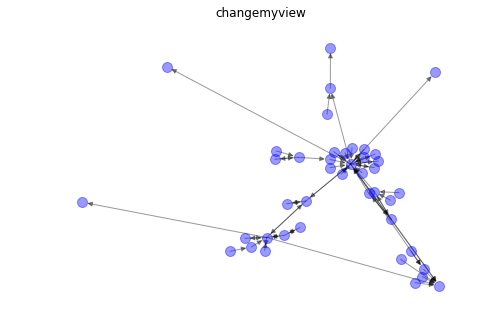

In [95]:
# https://www.reddit.com/r/changemyview/comments/bqvmgx/cmv_late_term_abortion_third_trimester_should/
directed_network('bqvmgx','blue','changemyview')

In [96]:
triads('bqvmgx_noroot')

{'003': 9916, '012': 834, '102': 458, '021D': 10, '021U': 56, '021C': 54, '111D': 70, '111U': 46, '030T': 2, '030C': 0, '201': 32, '120D': 0, '120U': 2, '120C': 0, '210': 0, '300': 0}


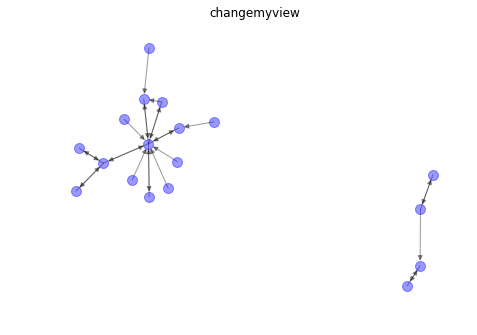

In [97]:
# https://www.reddit.com/r/changemyview/comments/bc8ofq/cmv_people_who_claim_capitalism_caused_or_is/
directed_network('bc8ofq','b','changemyview')

In [98]:
triads('bc8ofq_noroot')

{'003': 589, '012': 89, '102': 94, '021D': 0, '021U': 7, '021C': 0, '111D': 23, '111U': 1, '030T': 0, '030C': 0, '201': 12, '120D': 0, '120U': 0, '120C': 0, '210': 1, '300': 0}


## Networks for subreddit

In [131]:
# Take a subreddit name. Analyse the last 100 thread comments. Draw graph.

def sub_directed_network(subreddit_name, number_threads, color, graph_title):
    
    G = nx.DiGraph()
    G.clear()
    
    for submission in reddit.subreddit(subreddit_name).hot(limit=number_threads):
#         print(submission.title)
    
        # Create CSV file with user interaction relationships
        with open('network_files/comments_'+subreddit_name+'.csv', mode='a') as comments_file:
            comments_file = csv.writer(comments_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

#             submission = reddit.submission(id=submission.id)
            submission.comments.replace_more(limit=None)

            for comment in submission.comments.list():

                if comment.is_root is False:
                    parent = comment.parent()

                    comments_file.writerow([comment.id, comment.author, parent.id, parent.author])

                    for reply in comment.replies.list():
                        reply_parent = reply.parent()

                        comments_file.writerow([reply.id, reply.author, reply_parent.id, reply_parent.author])

    # Remove duplicate comments/replies
    with open('network_files/comments_'+subreddit_name+'.csv', 'r') as in_file, open('network_files/comments_'+subreddit_name+'_noroot_clean.csv','w') as out_file:
        seen = set() # set for fast O(1) amortized lookup
        for line in in_file:
            if line in seen: continue # skip duplicate

            seen.add(line)
            out_file.write(line)

    # Open the CSV file and use to graph the network
    with open('network_files/comments_'+subreddit_name+'_noroot_clean.csv') as commentsreader:
        commentsreader = csv.reader(commentsreader, delimiter=',', quotechar='|')
        for row in commentsreader:
            G.add_edges_from([(row[1],row[3])])

        nx.draw(G, node_size=100, alpha=0.3, node_color=color)
        # labels=nx.draw_networkx_labels(G,pos=nx.spring_layout(G),font_size=6)

        plt.title(graph_title)
        plt.show()


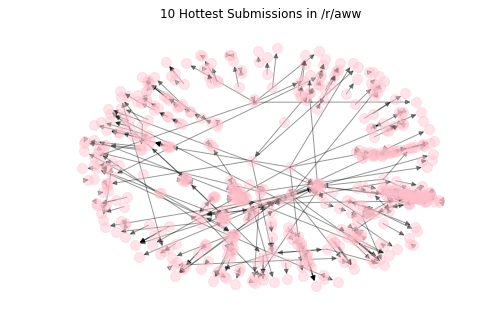

In [125]:
sub_directed_network('aww','pink','10 Hottest Submissions in /r/aww')

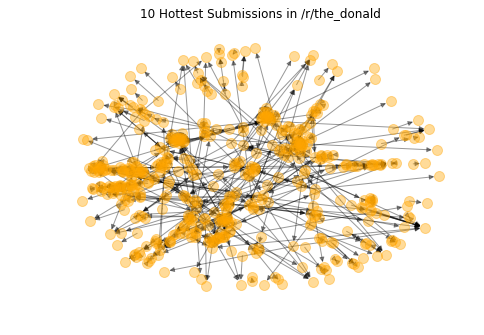

In [126]:
sub_directed_network('the_donald','orange','10 Hottest Submissions in /r/the_donald')

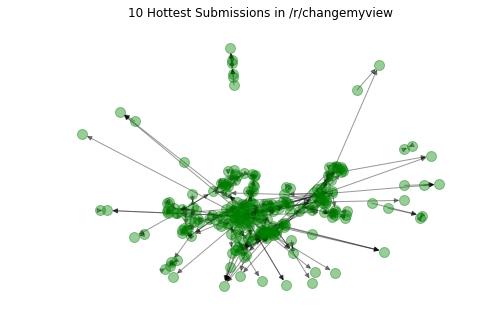

In [128]:
sub_directed_network('changemyview','green','10 Hottest Submissions in /r/changemyview')

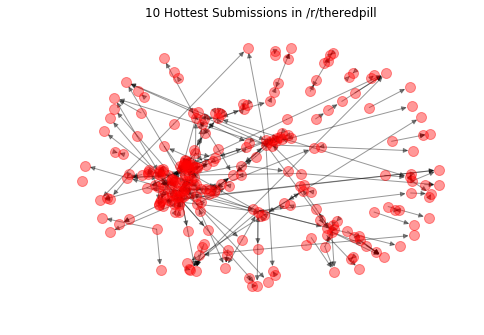

In [130]:
sub_directed_network('theredpill','red','10 Hottest Submissions in /r/theredpill')

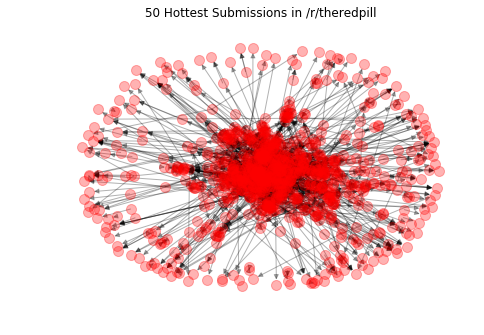

In [133]:
sub_directed_network('theredpill', 50, 'red','50 Hottest Submissions in /r/theredpill')

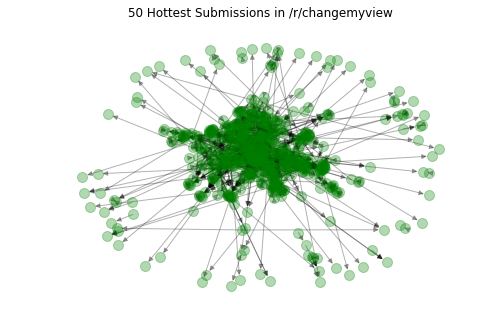

In [134]:
sub_directed_network('changemyview', 50, 'green','50 Hottest Submissions in /r/changemyview')

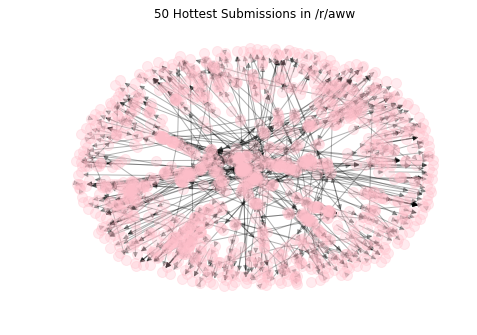

In [135]:
sub_directed_network('aww', 50, 'pink','50 Hottest Submissions in /r/aww')

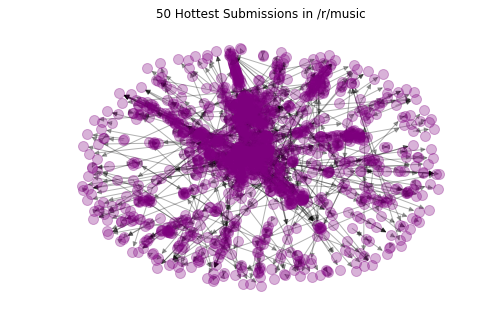

In [136]:
sub_directed_network('music', 50, 'purple','50 Hottest Submissions in /r/music')

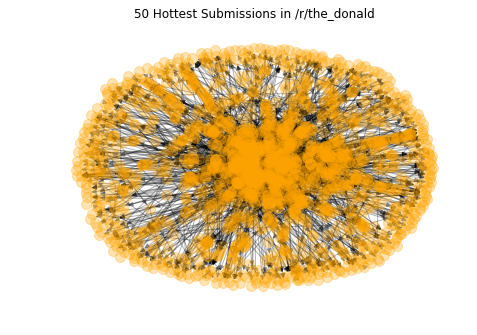

Number of nodes:  2136
Number of edges:  3577
Density:  0.000784367900779763


In [147]:
sub_directed_network('the_donald', 50, 'orange','50 Hottest Submissions in /r/the_donald')
network_stats('the_donald')

In [162]:
def network_stats(subreddit_name):
    
    G = nx.DiGraph()
    G.clear()

    # Open the CSV file and use to graph the network
    with open('network_files/comments_'+subreddit_name+'_noroot_clean.csv') as commentsreader:
        commentsreader = csv.reader(commentsreader, delimiter=',', quotechar='|')
        for row in commentsreader:
            G.add_edges_from([(row[1],row[3])])

#         nx.draw(G, node_size=100, alpha=0.3, node_color=color)
#         # labels=nx.draw_networkx_labels(G,pos=nx.spring_layout(G),font_size=6)

#         plt.title(graph_title)
#         plt.show()

#     print("Number of nodes: ", nx.number_of_nodes(G))
#     print("Number of edges: ", nx.number_of_edges(G))
#     print("Density: ", nx.density(G))
#     print(nx.triadic_census(G))
    
#     DEGREE SEQUENCE 
    degree_sequence = [d for n, d in G.degree()]  # degree sequence
#     print("Degree sequence %s" % degree_sequence)

    indegree = ([d for n, d in G.in_degree()])
    outdegree = ([d for n, d in G.out_degree()])
    
    
    sdf(indegree, outdegree, nx.triadic_census(G))

In [163]:
def sdf(indegree, outedgree, triad_census):

    graphs = dict()
    triads = []
    
    for i in range(10):
        dic=[]
        graphs[i] = nx.directed_configuration_model(indegree,outedgree)
        triads.append(nx.triadic_census(graphs[i]))
    
#     print("Number of nodes: ", nx.number_of_nodes(graphs[1]))
#     print("Number of edges: ", nx.number_of_edges(graphs[1]))
#     print("Density: ", nx.density(graphs[1]))
#     print(nx.triadic_census(graphs[1]))

    
    N = float(len(triads))
    average_triads = { k : sum(t[k] for t in triads)/N for k in triads[0] }        
    
    sdf = { key : ( triad_census[key] -average_triads[key] ) / (triad_census[key] + average_triads[key] +3) for key, value in average_triads.items() }
        
    print(sdf)
    
    import matplotlib.pylab as plt
    plt.figure(figsize=(10,5))

    plt.plot(sdf.keys(), sdf.values())
    plt.show()

{'003': 0.000552295950840163, '012': -0.24716953291928917, '102': 0.9554655183922725, '021D': -0.6206530323248277, '021U': -0.13579671600754928, '021C': -0.5774044288497981, '111D': 0.6541827350934442, '111U': 0.6008896705115606, '030T': -0.3767441860465116, '030C': -0.273356401384083, '201': 0.9580819307716736, '120D': 0.27358490566037735, '120U': 0.5882352941176471, '120C': 0.11607142857142856, '210': 0.7269076305220884, '300': 0.7272727272727273}


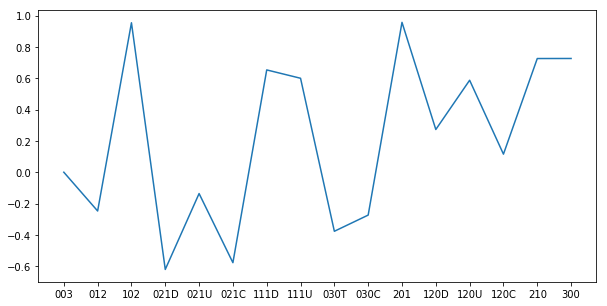

In [164]:
network_stats('music')

{'003': 0.001136469630701961, '012': -0.2301854005161152, '102': 0.9274158725365345, '021D': -0.4475211949340025, '021U': -0.31811482990984763, '021C': -0.5527055651839015, '111D': 0.6985847390867356, '111U': 0.7366574707945915, '030T': -0.5007414730598122, '030C': -0.5687885010266941, '201': 0.9686339248865043, '120D': 0.40794223826714804, '120U': 0.5705128205128206, '120C': 0.401673640167364, '210': 0.8544600938967135, '300': 0.5714285714285714}


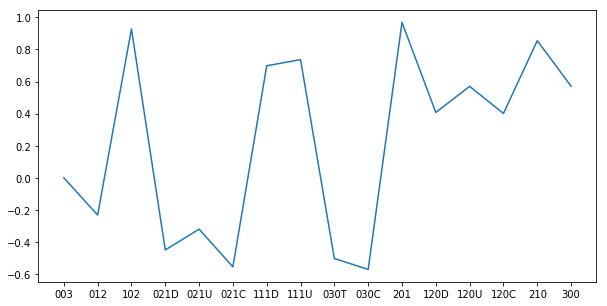

In [159]:
network_stats('theredpill')

{'003': 0.0002465964023001022, '012': -0.12696381398900394, '102': 0.9778781056086141, '021D': -0.2666990419849013, '021U': -0.20294957555842424, '021C': -0.41494038976708036, '111D': 0.9132430069930069, '111U': 0.8768898488120951, '030T': -0.03361344537815129, '030C': 0.1111111111111111, '201': 0.977961432506887, '120D': 0.6831683168316832, '120U': 0.6049382716049383, '120C': 0.5789473684210527, '210': 0.625, '300': 0.0}


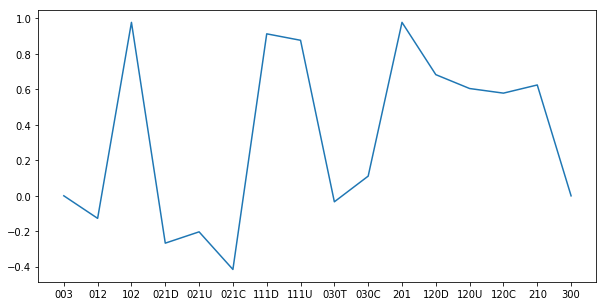

In [160]:
network_stats('aww')

{'003': 0.0033481082055580287, '012': -0.48424575285676974, '102': 0.9321614796700827, '021D': -0.6873010821133037, '021U': -0.6644660037840666, '021C': -0.7981468044866838, '111D': 0.6369363898588127, '111U': 0.5550564454163958, '030T': -0.7883295194508009, '030C': -0.8976608187134502, '201': 0.9849559218091224, '120D': 0.25, '120U': 0.07692307692307693, '120C': -0.32551319648093846, '210': 0.6935483870967741, '300': 0.7730496453900709}


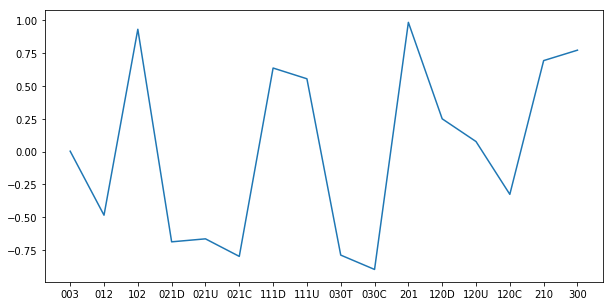

In [161]:
network_stats('changemyview')

{'003': 0.00023724698296757904, '012': -0.12079068403188621, '102': 0.9423747591234308, '021D': -0.14047566915015117, '021U': -0.22146047917230272, '021C': -0.5027856527090956, '111D': 0.6973244147157192, '111U': 0.7338089441251687, '030T': -0.139344262295082, '030C': -0.34256055363321797, '201': 0.9687433326221464, '120D': 0.6666666666666667, '120U': 0.2654320987654321, '120C': 0.3442622950819672, '210': 0.7874396135265701, '300': 0.37254901960784315}


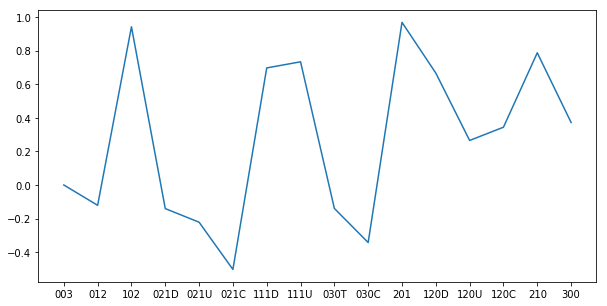

In [165]:
network_stats('the_donald')